##Installing Dependencies

In [58]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
%matplotlib inline

##Dataset Upload

In [25]:
spam = pd.read_csv('/content/spam.csv',encoding='ISO-8859-1')
spam.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


##Analyze the Dataset

In [26]:
spam.columns

Index(['v1', 'v2', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], dtype='object')

In [27]:
spam = spam.iloc[:, :2]

In [28]:
spam.shape

(5572, 2)

In [29]:
spam = spam.drop_duplicates()

In [30]:
spam.shape

(5169, 2)

In [31]:
spam.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5169 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   v1      5169 non-null   object
 1   v2      5169 non-null   object
dtypes: object(2)
memory usage: 121.1+ KB


In [32]:
spam.isna().sum()

v1    0
v2    0
dtype: int64

In [36]:
spam['Spam']=spam['v1'].apply(lambda x:1 if x=='spam' else 0)
spam.head(5)

,v1,v2,Spam
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0


In [37]:
n1 = len(spam[spam['v1'] == 'spam'])
print("No of spam in Dataset:",n1)
n2 = len(spam[spam['v1'] == 'ham'])
print("No of ham in Dataset:",n2)

No of spam in Dataset: 653
No of ham in Dataset: 4516


##Visualization

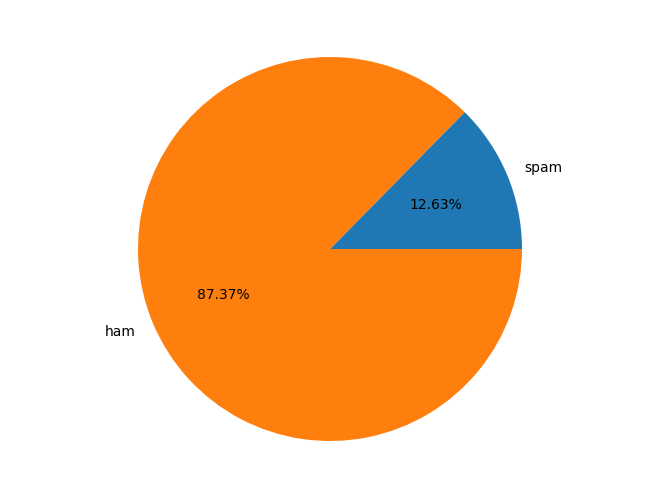

In [38]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.axis('equal')
l = ['spam', 'ham']
s = [653,4516]
ax.pie(s, labels = l,autopct='%1.2f%%')
plt.show()

##Train test Split

In [39]:
X_train,X_test,y_train,y_test=train_test_split(spam.v2,spam.Spam,test_size=0.3)

##CountVectorizer and Multinomial Naive Bayes

In [53]:
from sklearn.pipeline import Pipeline
clf=Pipeline([
    ('vectorizer',CountVectorizer()),
    ('nb',MultinomialNB())
])
clf.fit(X_train,y_train)
prediction1 = clf.predict(X_test)
print('Accuracy:',metrics.accuracy_score(prediction1,y_test))
confusion_mat1 = confusion_matrix(y_test,prediction1)
print("Confusion matrix: \n",confusion_mat1)

Accuracy: 0.9890393294648614
Confusion matrix: 
 [[1343    3]
 [  14  191]]


##TF-IDF Vectorrizer and Logistic Regression

In [54]:
from sklearn.pipeline import Pipeline
clf=Pipeline([
    ('vectorizer',TfidfVectorizer()),
    ('lr',LogisticRegression())
])
clf.fit(X_train,y_train)
prediction1 = clf.predict(X_test)
print('Accuracy:',metrics.accuracy_score(prediction1,y_test))
confusion_mat1 = confusion_matrix(y_test,prediction1)
print("Confusion matrix: \n",confusion_mat1)

Accuracy: 0.9696969696969697
Confusion matrix: 
 [[1345    1]
 [  46  159]]


##CountVectorrizer and Logistic Regressor

In [56]:
from sklearn.pipeline import Pipeline
clf=Pipeline([
    ('vectorizer',CountVectorizer()),
    ('lr',LogisticRegression())
])
clf.fit(X_train,y_train)
prediction1 = clf.predict(X_test)
print('Accuracy:',metrics.accuracy_score(prediction1,y_test))
confusion_mat1 = confusion_matrix(y_test,prediction1)
print("Confusion matrix: \n",confusion_mat1)

Accuracy: 0.9825918762088974
Confusion matrix: 
 [[1345    1]
 [  26  179]]


##TF-IDF Vectorrizer and Multinomial Naive Bayes

In [57]:
from sklearn.pipeline import Pipeline
clf=Pipeline([
    ('vectorizer',TfidfVectorizer()),
    ('nb',MultinomialNB())
])
clf.fit(X_train,y_train)
prediction1 = clf.predict(X_test)
print('Accuracy:',metrics.accuracy_score(prediction1,y_test))
confusion_mat1 = confusion_matrix(y_test,prediction1)
print("Confusion matrix: \n",confusion_mat1)

Accuracy: 0.9509993552546744
Confusion matrix: 
 [[1346    0]
 [  76  129]]
